In [1]:
import time

import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar_data = pd.read_csv('Data/calendar.csv')
sales_data = pd.read_csv('Data/sales_train_validation.csv')
weekly_sale_price_data = pd.read_csv('Data/sell_prices.csv')

In [3]:
calendar_data['date'] = pd.DatetimeIndex(calendar_data.date)

In [4]:
calendar_data.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
calendar_data.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [6]:
calendar_data.tail(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [7]:
sales_data.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


In [11]:
weekly_sale_price_data.head(5)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [12]:
# %%time
# calendar_profile = calendar_data.profile_report(title = 'M5 Forecasting - Calendar Data Profile')
# calendar_profile.to_file(output_file = "Calendar_Data_Profile.html")

In [13]:
# %%time
# sales_data_ids_profile = sales_data.iloc[:, :6].profile_report(title = 'M5 Forecasting - Sales Data IDs Profile')
# sales_data_ids_profile.to_file(output_file = "Sales_Data_IDs_Profile.html")

In [14]:
# %%time
# weekly_sale_price_data_profile = weekly_sale_price_data.profile_report(title = 'M5 Forecasting - Weekly Sale Price Data Profile')
# weekly_sale_price_data_profile.to_file(output_file = "Weekly_Sale_Price_Data_Profile.html")

In [15]:
day_cols = sales_data.columns[6:]
averaged_item_sales = sales_data.groupby('item_id')[day_cols].mean().T

In [16]:
averaged_item_sales.head()

item_id,FOODS_1_001,FOODS_1_002,FOODS_1_003,FOODS_1_004,FOODS_1_005,FOODS_1_006,FOODS_1_008,FOODS_1_009,FOODS_1_010,FOODS_1_011,...,HOUSEHOLD_2_507,HOUSEHOLD_2_508,HOUSEHOLD_2_509,HOUSEHOLD_2_510,HOUSEHOLD_2_511,HOUSEHOLD_2_512,HOUSEHOLD_2_513,HOUSEHOLD_2_514,HOUSEHOLD_2_515,HOUSEHOLD_2_516
d_1,0.6,0.4,1.4,0.0,3.4,1.6,0.0,0.0,0.0,0.7,...,0.0,0.0,0.8,0.0,2.0,0.5,0.0,0.4,0.0,0.2
d_2,0.6,0.5,0.8,0.0,3.2,0.9,0.0,0.0,0.0,0.1,...,0.0,0.0,1.0,0.0,2.4,0.4,0.0,0.8,0.0,0.4
d_3,0.4,0.7,0.3,0.0,1.3,2.0,0.0,0.0,0.0,0.5,...,0.0,0.0,1.2,0.0,0.7,0.1,0.0,0.2,0.0,0.0
d_4,0.6,0.4,0.6,0.0,2.0,1.6,0.0,0.0,0.0,0.1,...,0.0,0.0,0.8,0.0,0.7,0.3,0.0,0.1,0.0,0.3
d_5,0.7,0.3,0.3,0.0,1.0,1.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.9,0.0,0.9,0.2,0.0,0.1,0.0,0.1


In [17]:
# %%time
# averaged_item_sales_profile = averaged_item_sales.profile_report(title = 'M5 Forecasting - Averaged Item Sales Profile', 
#                                                                  pool_size = 8)
# averaged_item_sales_profile.to_file(output_file = "Averaged_Item_Sales_Profile.html")

In [18]:
item_sales_corrs = averaged_item_sales.corr()

In [19]:
item_sales_corrs.head()

item_id,FOODS_1_001,FOODS_1_002,FOODS_1_003,FOODS_1_004,FOODS_1_005,FOODS_1_006,FOODS_1_008,FOODS_1_009,FOODS_1_010,FOODS_1_011,...,HOUSEHOLD_2_507,HOUSEHOLD_2_508,HOUSEHOLD_2_509,HOUSEHOLD_2_510,HOUSEHOLD_2_511,HOUSEHOLD_2_512,HOUSEHOLD_2_513,HOUSEHOLD_2_514,HOUSEHOLD_2_515,HOUSEHOLD_2_516
item_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001,1.000000,0.064179,0.211582,-0.010271,0.073942,0.071094,-0.005278,0.094565,-0.094671,0.096496,...,0.168518,-0.002739,0.046350,0.089426,0.282171,0.081103,-0.237706,0.083987,-0.109812,-0.005735
FOODS_1_002,0.064179,1.000000,0.089203,0.059364,0.063977,0.052831,0.025301,0.039285,0.002755,0.044322,...,0.071718,-0.011928,0.056039,0.083764,0.080868,0.043698,-0.020029,0.064594,0.052431,0.044144
FOODS_1_003,0.211582,0.089203,1.000000,-0.033026,0.067111,0.149153,-0.024213,-0.000274,-0.202621,0.008750,...,0.157196,-0.068634,0.109294,0.121859,0.284644,0.089435,-0.223661,0.096967,-0.230040,0.018501
FOODS_1_004,-0.010271,0.059364,-0.033026,1.000000,-0.115341,-0.069658,0.187809,0.275041,0.106399,0.094413,...,0.042018,0.243229,0.044265,0.157336,-0.210491,0.020233,0.189544,0.080369,0.075623,0.007249
FOODS_1_005,0.073942,0.063977,0.067111,-0.115341,1.000000,0.107712,0.131129,0.007023,0.045568,0.009713,...,-0.005825,-0.030868,0.071406,-0.030238,0.181653,-0.122469,-0.134085,0.082702,-0.013597,0.086135


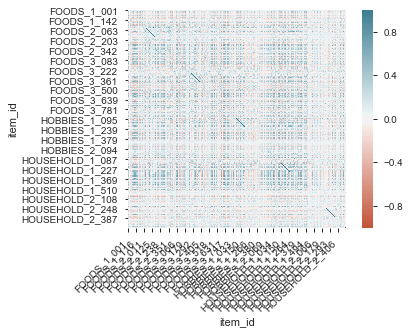

In [20]:
ax = sns.heatmap(
    item_sales_corrs, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Calendar Data

In [21]:
calendar_data.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [22]:
calendar_data['day_of_month'] = pd.DatetimeIndex(calendar_data.date).day

In [23]:
print('start date:', calendar_data.date.min())
print('end date:', calendar_data.date.max())
print('num days:', len(calendar_data))

start date: 2011-01-29 00:00:00
end date: 2016-06-19 00:00:00
num days: 1969


In [24]:
print('Event Name 1:', calendar_data.event_name_1.unique())
print('Event Type_1:', calendar_data.event_type_1.value_counts())

Event Name 1: [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
Event Type_1: Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64


In [25]:
print('Event Name 2:', calendar_data.event_name_2.value_counts())
print('Event Type_2:', calendar_data.event_type_2.value_counts())

Event Name 2: Father's day      2
Cinco De Mayo     1
OrthodoxEaster    1
Easter            1
Name: event_name_2, dtype: int64
Event Type_2: Cultural     4
Religious    1
Name: event_type_2, dtype: int64


In [26]:
first_year = calendar_data[calendar_data['date'] < '2012-01-29']
first_year.groupby('day_of_month')[['snap_CA', 'snap_TX', 'snap_WI']].sum()

,snap_CA,snap_TX,snap_WI
day_of_month,,,
1,12,12,0
2,12,0,12
3,12,12,12
4,12,0,0
5,12,12,12
6,12,12,12
7,12,12,0
8,12,0,12
9,12,12,12


### Sales Data Wide

In [27]:
sales_data.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


In [28]:
sales_data.shape

(30490, 1919)

In [29]:
id_values = sales_data[['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()

In [30]:
print('Categories:', id_values.cat_id.unique())
print('Departments:', id_values.dept_id.unique())
print('Stores:', id_values.store_id.unique())

Categories: ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Departments: ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
Stores: ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [31]:
id_values.groupby(['cat_id', 'dept_id']).item_id.nunique()

cat_id     dept_id    
FOODS      FOODS_1        216
           FOODS_2        398
           FOODS_3        823
HOBBIES    HOBBIES_1      416
           HOBBIES_2      149
HOUSEHOLD  HOUSEHOLD_1    532
           HOUSEHOLD_2    515
Name: item_id, dtype: int64

In [32]:
id_values.describe()

,item_id,dept_id,cat_id,store_id,state_id
count,30490,30490,30490,30490,30490
unique,3049,7,3,10,3
top,HOUSEHOLD_1_447,FOODS_3,FOODS,CA_3,CA
freq,10,8230,14370,3049,12196


In [33]:
id_values.isnull().any()

item_id     False
dept_id     False
cat_id      False
store_id    False
state_id    False
dtype: bool

In [34]:
any(sales_data.isna().any() == True)

False

In [35]:
any(sales_data.iloc[:, 6:].min() < 0)

False